# Metropolis Hastings Algorithm

We implement the Metropolis Hastings algorithm for sampling from the posterior distribution. We use the gun control example from earlier lectures (see `bayes_introP.ipynb` and `bayes_conjugateP.ipynb` for background).

Note that in practice one would not use the Metropolis algorithm here because this is a conjugate model, so we can determine the posterior analytically. However this serves as a good check that we are implementing the algorithm correctly.

The Metropolis algorithm is an MCMC method which generates samples from the posterior distribution. These samples can then be used to approximate the posterior density, the posterior mean, and construct credible intervals.

In [233]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [234]:
## the posterior is proportional to post
## note: more numerically stable to return log (f(x|p)pi(p))
##       and then exponentiate within metropolis. we do not
##       do this here to keep code as simple as possible
def post(p):
    return beta.pdf(p, 4, 4)*np.power(p,70)*np.power(1.0-p,30)

We now run Metropolis with a normal proposal distribution.

In [235]:
## an simple implementation Metropolis Hastings algorithm
Niter = 10000
chain = np.zeros(Niter)
chain[0] = 0.3


In [236]:
for ii in np.arange(Niter-1):
        prop = chain[ii] + np.random.normal(loc=0.0,scale=0.05,size=1)
        if (post(prop) / post(chain[ii])) > np.random.uniform():
            chain[ii+1] = prop
        else:
            chain[ii+1] = chain[ii]

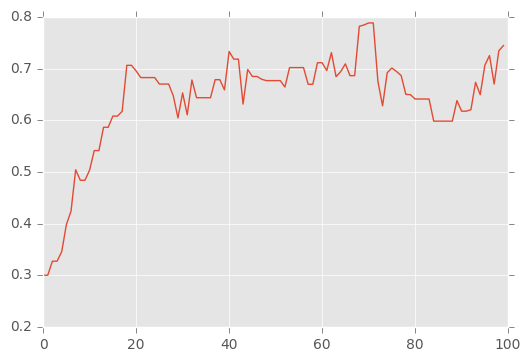

In [237]:
## the chain takes 40+ iterations to converge to a steady state
## usually much longer for more realistic problems
## this is known as burn in
fig = plt.figure()
ax = plt.axes()
plt.plot(np.arange(100), chain[:100]);

In [205]:
## remove the first 1000 iterations to get rid of burn in
chain = chain[1000:]

In [206]:
np.size(chain)

9000

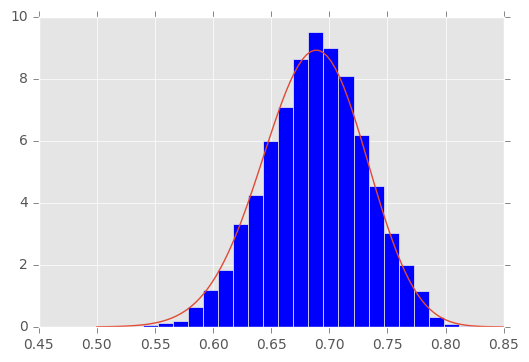

In [207]:
fig = plt.figure()
ax = plt.axes()
n, bins, rectangles = ax.hist(chain,25,normed=True,color='blue')
p = np.linspace(.5,.85,100);
plt.plot(p, beta.pdf(p,74,34));

## Posterior Summaries from Chain

We compute the posterior mean and a 95% confidence interval from the Metropolis chain. This should approximately match the exact results from using model conjugacy.

In [208]:
## posterior mean estimate
np.mean(chain)

0.6881587298824549

In [209]:
## posterior mean from model conjugacy
74.0 / 108.0

0.6851851851851852

To construct a 95% credible interval we compute the 2.5 percentile and the 97.5 percentile of chain

In [210]:
chain_s = np.sort(chain)
ixL = np.floor(np.size(chain_s)*.025).astype(int) ## lower index
ixU = np.floor(np.size(chain_s)*.975).astype(int) ## upper index

In [211]:
chain_s[ixL]

0.6020716980709216

In [212]:
chain_s[ixU]

0.7695917388707308

In [213]:
lhs = beta.ppf(0.025, 74, 34)
rhs = beta.ppf(0.975, 74, 34)
print(lhs)
print(rhs)

0.5949645643680469
0.7689093453760492


## Tuning Metropolis and Monitoring Convergence

Successful application of Metropolis is a bit of an art.

* The variance of the proposal distribution should be the same order as the variance of the posterior distribution.
* The initial iterates prior to convergence should be discarded.
* Run multiple chains from several starting points and monitor that the chains have mixed i.e. are not in separate regions of parameter space.

Chapter 11 of "Bayesian Data Analysis" by Gelman has some discussion including quantitative measures of convergence. We discuss these more in our next logistic regression example.

Finally note that it is generally a good idea to compute the log posterior at current and future interations and then exponentiate the difference. This is more numerically stable. However we did not do that here.